# Python Class for Izhikevich Neural Model

* Using Runge-Kutta 4th Method
\begin{equation}
\dfrac{dv}{dt}=0.04 v^{2}+5 v+140-u+I
\end{equation}

\begin{equation}
\dfrac{du}{dt}=a(bv-u)
\end{equation}

\begin{equation}
if ~ v=30mv, ~ then: ~~ v\leftarrow c , u\leftarrow u+c
\end{equation}

In [1]:
import matplotlib.pyplot as plt

In [2]:
class izhi():
    def __init__(self,u0,v0,I0,a0,b0,c0,d0,h0):
        self.u=u0
        self.v=v0
        self.I=I0
        self.a=a0
        self.b=b0
        self.c=c0
        self.d=d0
        self.h=h0
        self.t=0
    def f_v(self,v,u):
        return 0.04*v**2+5*v+140-u+self.I
    def f_u(self,v,u):
        return self.a*(self.b*v-u)
    def k1v(self,v,u):
        return self.h*self.f_v(v,u)
    def k1u(self,v,u):
        return self.h*self.f_u(v,u)
    def k2v(self,v,u):
        return self.h*self.f_v(v+0.5*self.k1v(v,u),u+0.5*self.k1u(v,u))
    def k2u(self,v,u):
        return self.h*self.f_u(v+0.5*self.k1v(v,u),u+0.5*self.k1u(v,u))
    def k3v(self,v,u):
        return self.h*self.f_v(v+0.5*self.k2v(v,u),u+0.5*self.k2u(v,u))
    def k3u(self,v,u):
        return self.h*self.f_u(v+0.5*self.k2v(v,u),u+0.5*self.k2u(v,u))
    def k4v(self,v,u):
        return self.h*self.f_v(v+self.k3v(v,u),u+self.k3u(v,u))
    def k4u(self,v,u):
        return self.h*self.f_u(v+self.k3v(v,u),u+self.k3u(v,u))
    def RKv(self,v,u):
        return v+0.166666667*(self.k1v(v,u)+2*self.k2v(v,u)+2*self.k3v(v,u)+self.k4v(v,u))
    def RKu(self,v,u):
        return u+0.166666667*(self.k1u(v,u)+2*self.k2u(v,u)+2*self.k3u(v,u)+self.k4u(v,u))
    def Run(self,inI=0):#inI is input I from other neurons
        if self.v>=30:
            self.v=self.c
            self.u=self.u+self.d
        tempV=self.RKv(self.v,self.u)#solve v equation RK4
        tempU=self.RKu(self.v,self.u)#solve u equation RK4
        self.v=tempV
        self.u=tempU
        self.t+=self.h

# Regualr Spiking
v<sub>0</sub>=-50
<br>
u<sub>0</sub>=-50
<br>
I=10
<br>
a=0.02
<br>
b=0.2
<br>
c=-65
<br>
d=8
<br>
h=0.1ms *(Runge-Kutta time step size)*

In [4]:
n1=izhi(-50,-50,10,0.02,0.2,-65,8,0.1)
t=[]
vs=[]
us=[]
for i in range(0,10000,1):
    n1.Run()
    t.append(n1.t)
    vs.append(n1.v)
    us.append(n1.u)

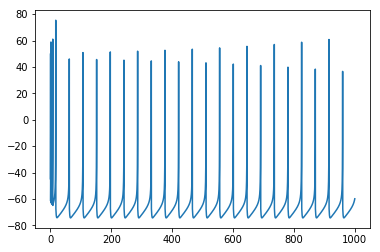

In [5]:
plt.plot(t,vs)
plt.show()